# AUTHOR : Shireesha Mudawath
# Task 1 - Prediction using Supervised ML
### Predict the percentage of a student based on the no. of study hours.
### What will be predicted score if a student studies for 9.25 hrs/ day?

# Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
info = pd.read_csv('https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv')

In [3]:
info.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
info.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


The data is of 25 students, on an average they study about 5 hours and score about 51.5 marks. 
The min being 1 hour and the max being 9.2 hours.

### For a Linear Regression to be implemented, there must be a relationship between the independent and the dependent variables. Let's see if there is any relationship between the hours studied and the marks scored.

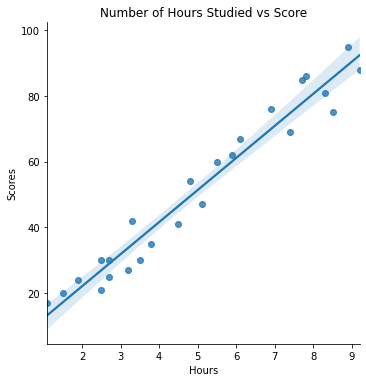

In [5]:
sns.lmplot(x = 'Hours',y = 'Scores',data = info)
plt.title('Number of Hours Studied vs Score')
plt.show()

We can clearly see that a regression exists and that the Scores are directly proportional to the No.of hours studied.

# Train Test Split

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [7]:
info.columns

Index(['Hours', 'Scores'], dtype='object')

In [8]:
X = info[['Hours']]
y = info.Scores

In [9]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.20,random_state = 0)

In [10]:
len(X_train),len(X_test)

(20, 5)

# Model Fitting

In [11]:
lm = LinearRegression()

In [12]:
lm.fit(X_train, y_train)

LinearRegression()

In [13]:
pd.DataFrame({'Actual Score':y_test,'Predicted Score':lm.predict(X_test)})

,Actual Score,Predicted Score
5,20,16.884145
2,27,33.732261
19,69,75.357018
16,30,26.794801
11,62,60.491033


Predicting for a new value.

In [14]:
print('Coefficient of Hours is ',lm.coef_)
print('The intercept is',lm.intercept_)

Coefficient of Hours is  [9.91065648]
The intercept is 2.018160041434683


Clearly we can see that the coefficient is 9.91065648 and the intercept is 2.018160041434683. Therefore by using the line equation y = mx + c, the line is y = 9.91065648(x) + 2.018160041434683. So, for 9.25 hours it turns out to be, y = (9.25)(9.91065648) + 2.018160041434683. The score is 93.69173248143468. 

In [15]:
# Any value can be tested.
hours = [[9.25]]
own_pred = lm.predict(hours)
print("No of Hours = {}".format(hours))
print("Predicted Score = {:.2f}".format(own_pred[0]))

No of Hours = [[9.25]]
Predicted Score = 93.69


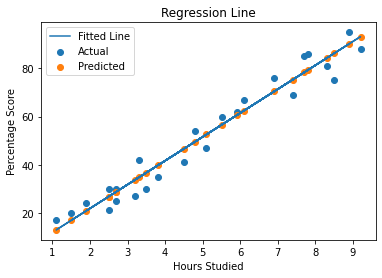

In [16]:
pred = lm.predict(info[['Hours']])
plt.scatter(info.Hours, info.Scores, label='Actual')
plt.title('Regression Line') 
plt.scatter(info.Hours, pred,label = 'Predicted')
plt.plot(info.Hours, pred,label = 'Fitted Line')
plt.legend()
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score') 
plt.show()

In [17]:
pred = lm.predict(info[['Hours']])
residuals = info.Scores - pred
print(residuals.mean())
print(residuals.sum())

-0.21037032241357323
-5.259258060339336


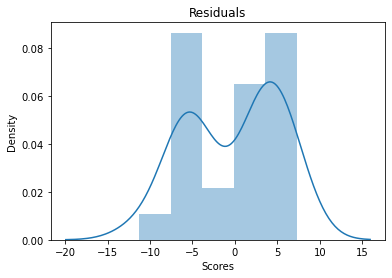

In [18]:
plt.title('Residuals')
sns.distplot(residuals,bins=5)
plt.show()

Therefore, the answer is obtained for the question by using Linear Regression. The answer is 93.69173248143468.